#### About the pattern
The sliding window pattern is used to process sequential data, arrays, and strings, for example, to efficiently solve subarray or substring problems. It involves maintaining a dynamic window that slides through the array or string, adjusting its boundaries as needed to track relevant elements or characters. The window is used to slide over the data in chunks corresponding to the window size, and this can be set according to the problem’s requirements. It may be viewed as a variation of the two pointers pattern, with the pointers being used to set the window bounds.

Imagine you’re in a long hallway lined with paintings, and you’re looking through a narrow frame that only reveals a portion of this hallway at any time. As you move the frame along the hallway, new paintings come into view while others leave the frame. This process of moving and adjusting what’s visible through the frame is akin to how the sliding window technique operates over data.

Why is this method more efficient? Consider we need to find k consecutive integers with the largest sum in an array. The time complexity of the naive solution to this problem would be O(kn), because we need to compute sums of all subarrays of size 𝑘. On the other hand, if we employ the sliding window pattern, instead of computing the sum of all elements in the window, we can just subtract the element exiting the window, add the element entering the window, and update the maximum sum accordingly. In this way, we can update the sums in constant time, yielding an overall time complexity of O(n)
. To summarize, generally, the computations performed every time the window moves should take O(1) time or a slow-growing function, such as the log of a small variable.

The following illustration shows a possibility of how a window could move along an array:

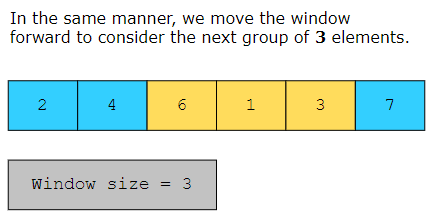

#### Does your problem match this pattern?
Yes, if all of these conditions are fulfilled:

* Contiguous data: The input data is stored in a contiguous manner, such as an array or string.

* Processing subsets of elements: The problem requires repeated computations on a contiguous subset of data elements (a subarray or a substring), such that the window moves across the input array from one end to the other. The size of the window may be fixed or variable, depending on the requirements of the problem.

* Efficient computation time complexity: The computations performed every time the window moves take constant or very small time.

#### Question 1
Given a string, s, that represents a DNA subsequence, and a number k, return all the contiguous subsequences (substrings) of length 𝑘 that occur more than once in the string. The order of the returned subsequences does not matter. If no repeated substring is found, the function should return an empty set.

The DNA sequence is composed of a series of nucleotides abbreviated as A,B,C,.... For example, ACGAATTCCG is a DNA sequence. When studying DNA, it is useful to identify repeated sequences in it.

In [2]:
# naive approach
def find_repeated_sequences(s, k):
    repeat_seq = []
    acc_list = []
    for i in range(len(s)-k+1):
        left_idx = i
        right_idx = i+k
        current_seq = s[left_idx:right_idx]
        if current_seq in acc_list:
            repeat_seq.append(current_seq)
        
        acc_list.append(current_seq)



    

    return set(repeat_seq)

In [ ]:
# sliding window approach


#### Question 2 - medium

Given an integer list, nums, find the maximum values in all the contiguous subarrays (windows) of size w.



In [ ]:
# naive approach
# time complexity: O(n*w)
# O(n): looping the array for one time
# O(w): max of sub_arr
# space complexity: O(w)
# 
def find_max_sliding_window(nums, w):

    n = len(nums)
    max_list = []
    for i in range(n-w+1):
        left_idx = i
        right_idx = i+w
        sub_arr = nums[left_idx:right_idx] 
        max_list.append(max(sub_arr))

    return max_list

In [1]:
from collections import deque

def clean_current_window(index,current_window,nums):
  while current_window and nums[index] > nums[current_window[-1]]:
    current_window.pop()
    

def find_max_sliding_window(nums, w):
  outputs = []
  current_window = deque()
  
  for i in range(w):
    clean_current_window(i,current_window,nums)
    current_window.append(i)
  
  outputs.append(nums[current_window[0]])
  
  for i in range(w,len(nums)):
    clean_current_window(i,current_window,nums)
    current_window.append(i)
    
    # before deciding maximum, need to check if left boundary works
    if current_window and i > current_window[0] + w - 1:
      current_window.popleft()
    
    outputs.append(nums[current_window[0]])
  
  return outputs

[1, 2, 3]
[4]
[4, 5]
[6]
[7]


[3, 3, 5, 5, 6, 7]

#### Question 3 - hard

Given two strings, str1 and str2, find the shortest substring in str1 such that str2 is a subsequence of that substring.

A substring is defined as a contiguous sequence of characters within a string. A subsequence is a sequence that can be derived from another sequence by deleting zero or more elements without changing the order of the remaining elements.



#### Reflections
there are several decomposions of big complexity. Find those decompositions of complexity and then solve them sepaarately

In [5]:
def min_window(str1,str2):
    len_s1 = len(str1)
    len_s2 = len(str2)
    min_len = float('inf')
    min_str = ''
    idx_s1,idx_s2 = 0,0
    while idx_s1 < len_s1:

        if str1[idx_s1] == str2[idx_s2]:
            if idx_s2 == 0:
                start = idx_s1
            
            # increase idx of str2
            idx_s2 += 1

            # update min_str
            # check if str2 reaches to the end
            # if it reaches to the end, it means s1 substring contains all str2
            if idx_s2 == len_s2:
                end = idx_s1
                min_len_current = end + 1 - start
                if min_len_current < min_len:
                    # update minimum string
                    min_str = str1[start:end+1]
                
                # we need to reset idx_s2 and continue looping str1
                idx_s2 = 0
                idx_s1 = end + 1 # continue looping str
                continue
        

        
        # unless a substring is found is s1, update idx_s1
        idx_s1 += 1
    return min_str


In [1]:
from collections import deque

# a less optimal solution
# but okay approach

def min_window(str1, str2):
    # edge case
    if len(str1) < len(str2):
      return ""
    
    # construct queue list of str2 
    queue_str2 = deque(str2)
    substr_list = []
    
    # first iteration
    for i in range(len(str1)):
      queue_str2_tmp = queue_str2.copy()
      if str1[i] != queue_str2_tmp[0]:
        continue
      
      sub_str_tmp = ""
      while queue_str2_tmp:
        if i > len(str1) - 1:
          break
        sub_str_tmp += str1[i]
        
        # if matched, remove first element of str2 
        if str1[i] == queue_str2_tmp[0]:
          queue_str2_tmp.popleft()
        
        i += 1
      
      # find substr is str2 queue is empty
      if not queue_str2_tmp:
        substr_list.append(sub_str_tmp)
      
    # find the shortest
    shortest_len = float('inf')
    shortest_str = ""
    for sub_str in substr_list:
      current_len = len(sub_str)
      if current_len < shortest_len:
        shortest_str = sub_str
        # update shortest
        shortest_len = current_len
    
    return shortest_str